# Computation of the entropy at 1 bar and a given temperature, step by step

The entropy at 1 bar and a given temperature is expressed as:

$$ s(P_r,T) = s(P_r,T_r) + \int_{P_r,T_r}^{P_r,T} \frac{C_p}{T}dT$$

In [2]:
import sympy as sp
import numpy as np
from sympy.interactive import printing
printing.init_printing(use_latex = True)

S_Pr_Tr = sp.Symbol("S(Pr, Tr)")
G_Pr_T  = sp.Symbol("G(Pr, T)")
G0,T,Tr = sp.symbols('G_0, T, Tr')
c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8 = sp.symbols('c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8')

## Heat capacity at a given temperature

In Holland and Powell datasets, the heat capacity is expressed as the following polinomial with only $c_1$ to $c_5$ terms

$$ C_p = c_1 +c_2T +\frac{c_3}{T^2} + c_4T^2 + \frac{c_5}{\sqrt{T}} + \frac{c_6}{T} + \frac{c_7}{T^3} + c_8T^3 $$


In [7]:
def Cp(T):
    return c_1 +c_2*T +c_3/T**2 + c_4*T**2 + c_5/sp.sqrt(T) + c_6/T + c_7/T**3 + c_8*T**3
Cp(1000).subs({c_1:233.3, c_2:.1494E-2, c_3:-603800, c_4:0, c_5:-1869.7 , c_6:0, c_7:0, c_8:0}).evalf()

## Symbolic computation of the integral $C_p/T$

In [8]:
Cp_T = (c_1 +c_2*T +c_3/T**2 + c_4*T**2 + c_5/sp.sqrt(T) + c_6/T + c_7/T**3 + c_8*T**3)/T

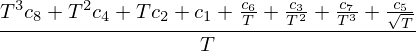

In [9]:
Cp_T

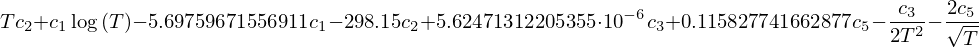

In [10]:
integral_Cp_T = sp.integrate(Cp_T,(T,Tr,T)).subs({Tr:298.15,c_4:0,c_6:0,c_7:0,c_8:0})
display(integral_Cp_T)

recover the expression using the "print" command 

In [12]:
print(integral_Cp_T)

T*c_2 + c_1*log(T) - 5.69759671556911*c_1 - 298.15*c_2 + 5.62471312205355e-6*c_3 + 0.115827741662877*c_5 - c_3/(2*T**2) - 2*c_5/sqrt(T)


## Entropy at 1 bar and T

The reference entropy at 1 bar and 298 K is the third law entropy given in thermodynamic tables which is the intrgral of $C_p$ from 0 K to 298 K. This assumes that there is no phase transition nor configurational entropy. 

In [14]:
def s(S_Pr_Tr,T):
    return S_Pr_Tr + T*c_2 + c_1*sp.log(T) - 5.69759671556911*c_1 - 298.15*c_2 + 5.62471312205355e-6*c_3 + 0.115827741662877*c_5 - c_3/(2*T**2) - 2*c_5/sp.sqrt(T)


In [15]:
s(95.1,1000).subs({c_1:233.3, c_2:.1494E-2, c_3:-603800, c_4:0, c_5:-1869.7 , c_6:0, c_7:0, c_8:0}).evalf()

# Gibbs energy at 1 bar and temperature T

Gibbs energy at 1 bar is the reference gibbs energy at 1 bar and 298 K ($G_0$) and the integral of the entropy at 1 bar (already computed above) from the reference temperature ($T_r$) to the given temperature ($T$)

$$ G(P_r,T) = G_0 - \int_{P_r,T_r}^{P_r,T} s(P_r,T)dT $$
$$ G(P_r,T) = G_0 - \int_{P_r,T_r}^{P_r,T} \left[ s(P_r,T_r) + \int_{P_r,T_r}^{P_r,T} \frac{C_p}{T}dT \right]dT $$

In [9]:
integral_S_Pr_T = sp.integrate(S_Pr_Tr + integral_Cp_T,(T,Tr,T))

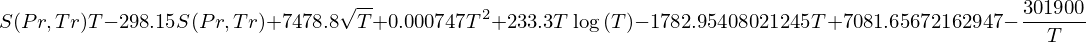

In [10]:
integral_S_Pr_T.subs({Tr:298.15,c_1:233.3, c_2:.1494E-2, c_3:-603800, c_4:0, c_5:-1869.7, c_6:0, c_7:0, c_8:0})

In [11]:
print(integral_S_Pr_T.subs({Tr:298.15,c_1:233.3, c_2:.1494E-2, c_3:-603800, c_4:0, c_5:-1869.7, c_6:0, c_7:0, c_8:0}))

S(Pr, Tr)*T - 298.15*S(Pr, Tr) + 7478.8*sqrt(T) + 0.000747*T**2 + 233.3*T*log(T) - 1782.95408021245*T + 7081.65672162947 - 301900/T


In [12]:
def g(G0,S_Pr_Tr,T):
    return G0 -(S_Pr_Tr*T - 298.15*S_Pr_Tr + 7478.8*sp.sqrt(T) + 0.000747*T**2 + 233.3*T*sp.log(T) - 1782.95408021245*T + 7081.65672162947 - 301900/T)

The following function give you the value of g at 1 bar by specifying the reference gibbs energy and reference entropy and the temperature of interest. 

In [13]:
g(-2200914,95.1,298.15).evalf()

For instance the gibbs energy of forsterite at 1 bar and 1000 K is

In [14]:
sp.Eq(G_Pr_T,g(-2200914,95.1,1000).evalf())

Verified with PerpleX_6.8.3_OSX_10.6 and HP11 where $G(1,1000)=-2340312$

## step by step

We can do the intregal in two steps. First $$- \int_{P_r,T_r}^{P_r,T} s(P_r,T)dT $$

In [42]:
def integralS(S_Pr_Tr,T):
    return -(S_Pr_Tr*T - 298.15*S_Pr_Tr + 7478.8*sp.sqrt(T) + 0.000747*T**2 + 233.3*T*sp.log(T) - 1782.95408021245*T + 7081.65672162947 - 301900/T)

In [47]:
integralS(95.1,1000).evalf()

Holland integral

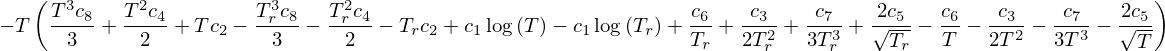

In [71]:
-T*integral_Cp_T

In [69]:
integral_Cp   = sp.integrate(Cp,(T,Tr,T))

In [75]:
integral_Cp_T = sp.integrate(Cp_T,(T,Tr,T))

In [54]:
Cp = c_1 +c_2*T +c_3/T**2 + c_4*T**2 + c_5/sp.sqrt(T) + c_6/T + c_7/T**3 + c_8*T**3

In [76]:
Holland = -T*integral_Cp_T + integral_Cp
Holland.subs({Tr:298.15,c_1:233.3, c_2:.1494E-2, c_3:-603800, c_4:0, c_5:-1869.7, c_6:0, c_7:0, c_8:0,T:1000}).evalf()

In [79]:
-72652.4047443836-95.1*(1000-298.15)

The numerical difference between the HP and the Perplex expression is $S(T-T_r)$

## Volume integral

Isothermal compressibility
$$ \beta = -v\left(\frac{\partial P}{\partial v} \right)_T$$
Isobaric expansivity
$$ \alpha = \frac{1}{v}\left(\frac{\partial v}{\partial T} \right)_P$$

### Assuming that elastic properties constant

Isobaric expansivity at 1 bar

$$ \alpha dT = \frac{dv}{v} $$
$$ \int_{1,T_r}^{1,T} \alpha dT = \int_{V(1,T_r)}^{V(1,T)} \frac{dv}{v}$$

In [23]:
alpha,T,Tr,v,v_0 = sp.symbols("alpha, T, T_r, v, v_0")
sp.integrate(alpha,(T,Tr,T))

In [24]:
sp.integrate(1/v,(v,v_0,v))

where $ v_0 = v(1,T_r)$, 1 bar and 298.15 K

Collect to define the equation

In [25]:
myfunction = sp.Eq(sp.integrate(alpha,(T,Tr,T)),sp.integrate(1/v,(v,v_0,v)))
display(myfunction)

Then at constant 1 bar pressure $Pr = 1$, the volume at a given temperature $v(1,T)$ is given as

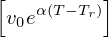

In [28]:
sp.solve(myfunction,v)

Isothermoal compressibility at constant elevated temperature $T$ 

$$ -\beta dP = \frac{dv}{v} $$
$$ \int_{P_r,T}^{P,T} \beta dP = \int_{V(P_r,T)}^{V(P_r,T)} \frac{dv}{v}$$

In [17]:
beta,P,Pr,v,v_T = sp.symbols("beta, P, P_r, v, v_T")
sp.integrate(-kappa,(P,Pr,P))

In [18]:
myfunction2 = sp.Eq(sp.integrate(-beta,(P,Pr,P)),sp.integrate(1/v,(v,v_T,v)))
display(myfunction2)

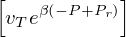

In [29]:
v_P_T = sp.solve(myfunction2,v)
display(v_P_T)

where $v_T$ is the volume at $T$ and $P_r=1$

Not working the direct substitution of VT for V(1,T). So it is substituted manually

In [30]:
v = sp.simplify(v_0*sp.exp(alpha*(T - Tr))*sp.exp(kappa*(-P + Pr)))
display(v)

In [31]:
print(v)

v_0*exp(alpha*(T - T_r) - beta*(P - P_r))


Volume not using the alpha approximation

In [32]:
(v_0*sp.exp(alpha*(T - Tr))*sp.exp(beta*(-P + Pr))).subs({Pr : 1, Tr : 298.15, alpha: 16E-5/4.366, beta : 3.2E-6/4.366, v_0 : 4.366, P: 1000, T: 1000})

More commonly the approximation of $exp(x)=1+x$, when $x$ is very small is used. Then the v(P,T)

In [33]:
v_PT = v_0*(1+alpha*(T - Tr) - beta*(P - Pr))
display(v_PT)

In [108]:
1/1250000

In [34]:
v_PT.subs({Pr : 1, Tr : 298.15, alpha: 16E-5/4.366, beta : 3.2E-6/4.366, v_0 : 4.366, P: 1000, T: 1000})

### PerpleX EoS = 1

In perplex the simplest EoS is the one previously detailed. Where $b_2 = v_0\alpha$ and $b_4 = v_0\kappa$
$$ v(T,P) = v_0 + b_2(T-T_r) + b_4(P-Pr)$$

For forsterite, $\alpha = 36.6 x 10^{-6} K^{-1}$, $v_0 = 4.366 J/bar$ and $\beta = 0.7 x 10^{-7} bar^{-1}$, therefore,

In [35]:
b2 = 4.366*(16E-5/4.366)
display(b2)
b4 = -4.366*(3.2E-6/4.366)
display(b4)

In [36]:
def v(P,T):
    return 4.366 + b2*(T-298.15)+b4*(P-1)


In [37]:
v(1000,1000)

Check with frendly and hp93ver.dat volume (J/mol/bar)= 4.474875 

### Integral

In [176]:
Volume_integral = sp.integrate(v_PT,(P,1,P))

In [180]:
Volume_integral.subs({Pr : 1, Tr : 298.15, alpha: 16E-5/4.366, kappa : 3.2E-6/4.366, v_0 : 4.366, P: 1000, T: 1000})

units in J. 

In [186]:
sp.Eq(G_Pr_T,g(-2052290,94.1,1000).evalf())

In [185]:
g(-2052290,94.1,1000).evalf()+Volume_integral.subs({Pr : 1, Tr : 298.15, alpha: 16E-5/4.366, kappa : 3.2E-6/4.366, v_0 : 4.366, P: 1000, T: 1000})

# Apparent Gibbs energy at P and T

Evaluated at 1000 bar and 1000 K.

In [189]:
g(-2052290,94.1,1000).evalf()+Volume_integral.subs({Pr : 1, Tr : 298.15, alpha: 16E-5/4.366, kappa : 3.2E-6/4.366, v_0 : 4.366, P: 1000, T: 1000})

In [1]:
P

NameError: name 'P' is not defined

In [38]:
-2053138+298.15*95.1

In [39]:
1/1262711

In [41]:
1/0.7992382E-06

reference gibbs = Holland and Powell 02 (entropy of formation) Table 2 of Bermann but not main equation. Example of olivine

In [82]:
-2172240-298.15*(95.1-2*32.68-1*18.83-2*205.138)

reference gibbs = Holland and Powell 11 (third law entropy)

In [83]:
-2172560-298.15*(95.1)

Then Bermann definition is like hp02?

In [ ]:
def G_berman(Hf,S,T):
    return H